In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


In [116]:
car_dataset=pd.read_csv(r'C:\Users\jasmi\Downloads\ML Classes\Assignments\Assignments_only\CarPrice_Assignment.csv')
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [117]:
car_dataset.info()
car_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [118]:
#Check for missing values 
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

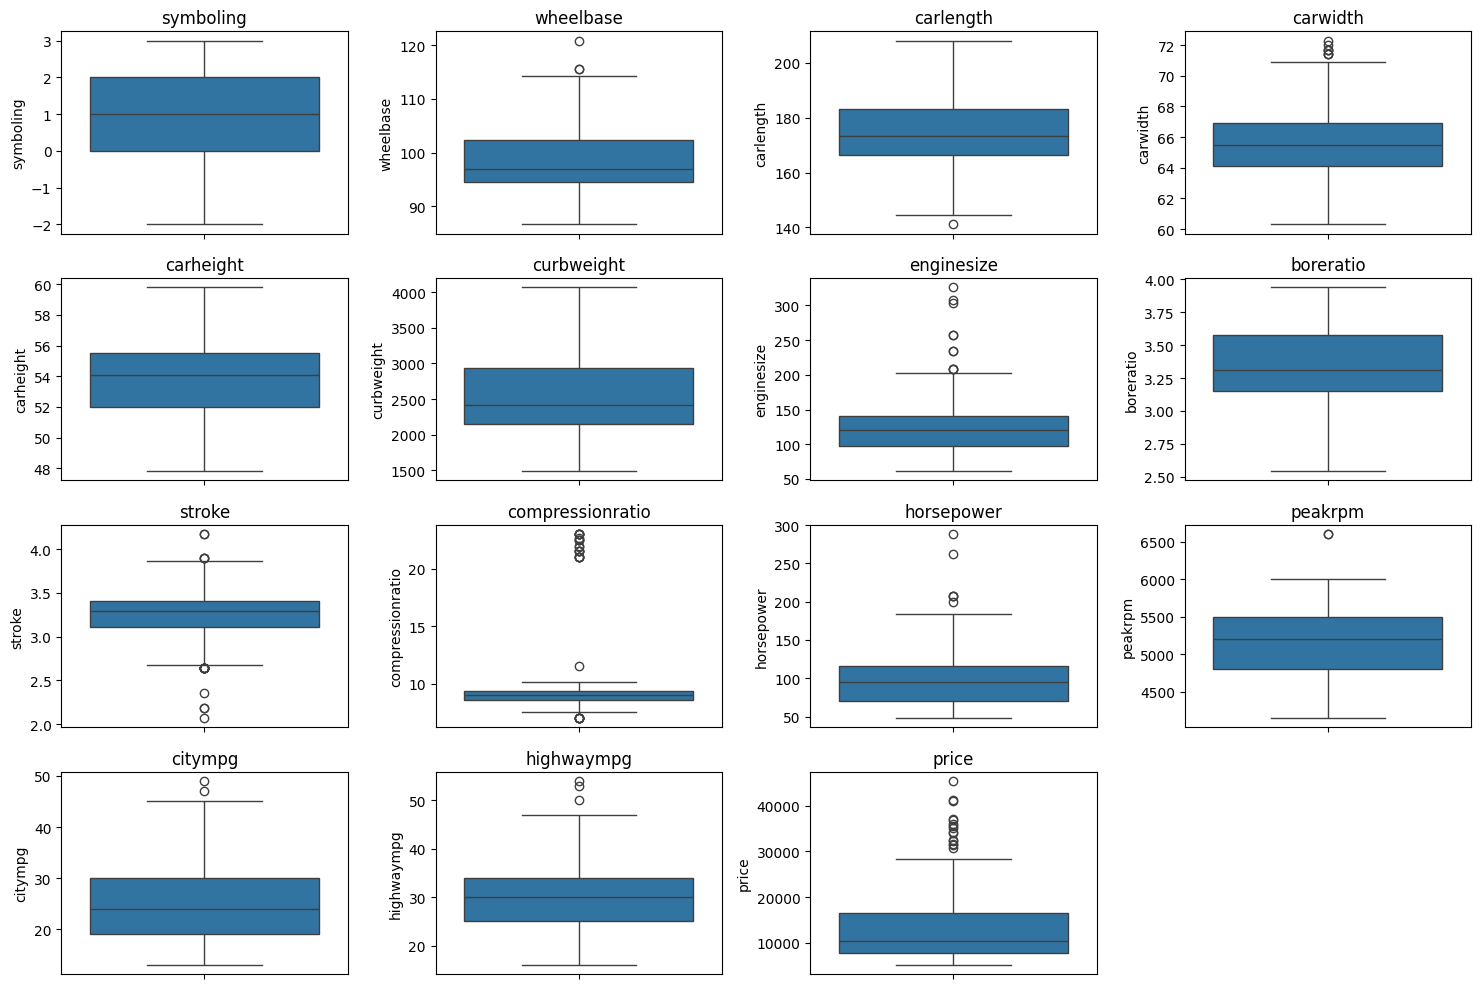

In [119]:
car_dataset.drop(['car_ID','CarName'],axis=1,inplace=True)
#Outlier detection and removal
num_cols = car_dataset.select_dtypes(include='number').columns

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4,4,i)
    sns.boxplot(y=car_dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Not removing the outliers as this might depends on premium cars as well.so not removing any utliers as this will directly impact the business.


In [120]:
#One hot encoding for categorical columns
categorical_cols=car_dataset.select_dtypes(include=['object']).columns
car_dataset=pd.get_dummies(car_dataset,columns=categorical_cols,drop_first=True)
car_dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [121]:
#Traintest split
X=car_dataset.drop('price',axis=1)
y=car_dataset['price']  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Feature Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [122]:
#Model Implementaion
# Model Implementation (10 marks): Implement the following five regression algorithms:
# ● Linear Regression
# ● Decision Tree Regressor
# ● Random Forest Regressor
# ● Gradient Boosting Regressor
# ● Support Vector Regressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [123]:
#Linear Regression
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)
lr_pred=lr_model.predict(X_test_scaled)
#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_mae=mean_absolute_error(y_test,lr_pred)
lr_mse=mean_squared_error(y_test,lr_pred)
lr_r2=r2_score(y_test,lr_pred)
print(f'Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R2: {lr_r2}')



Linear Regression - MAE: 2089.382729204777, MSE: 8482008.484371928, R2: 0.892556670032023


In [124]:
#decision Tree Regressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
dt_pred=dt_model.predict(X_test)
#Evaluation
dt_mae=mean_absolute_error(y_test,dt_pred)
dt_mse=mean_squared_error(y_test,dt_pred)
dt_r2=r2_score(y_test,dt_pred)  
print(f'Decision Tree Regressor - MAE: {dt_mae}, MSE: {dt_mse}, R2: {dt_r2}')   

Decision Tree Regressor - MAE: 1886.3211463414634, MSE: 8300272.356143635, R2: 0.8948587586031806


In [125]:
#Random Forest Regressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
#Evaluation
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print(f'Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}, R2: {rf_r2}')
# Hyperparameter tuning can be done using GridSearchCV or RandomizedSearchCV for better performance on gradient boost regressor
param_grid = {
      'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest model
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predictions
best_rf_pred = best_rf_model.predict(X_test)

# Evaluation
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)
best_rf_mse = mean_squared_error(y_test, best_rf_pred)
best_rf_r2 = r2_score(y_test, best_rf_pred)
print(f'Tuned Random Forest Regressor - MAE: {best_rf_mae}, MSE: {best_rf_mse}, R2: {best_rf_r2}')



Random Forest Regressor - MAE: 1261.4174512195123, MSE: 3314701.736754924, R2: 0.9580119976178074
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Tuned Random Forest Regressor - MAE: 1367.3844756529645, MSE: 4617427.737384612, R2: 0.941510101893297


In [126]:
#Gradient Boosting Regressor
gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(X_train,y_train)
gb_pred=gb_model.predict(X_test)
#Evaluation
gb_mae=mean_absolute_error(y_test,gb_pred)
gb_mse=mean_squared_error(y_test,gb_pred)
gb_r2=r2_score(y_test,gb_pred)
print(f'Gradient Boosting Regressor - MAE: {gb_mae}, MSE: {gb_mse}, R2: {gb_r2}')
#Hyparameret tuning for gardinet boosting
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_
best_gb_pred = best_gb_model.predict(X_test)
best_gb_mae = mean_absolute_error(y_test, best_gb_pred)
best_gb_mse = mean_squared_error(y_test, best_gb_pred)
best_gb_r2 = r2_score(y_test, best_gb_pred)
print(f'Tuned Gradient Boosting Regressor - MAE: {best_gb_mae}, MSE: {best_gb_mse}, R2: {best_gb_r2}')




Gradient Boosting Regressor - MAE: 1683.9518920721596, MSE: 5912585.344424135, R2: 0.9251040765527097
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Tuned Gradient Boosting Regressor - MAE: 1674.3939110668732, MSE: 5447356.818605671, R2: 0.9309972210953174


In [127]:
#support Vector Regressor
svr_model=SVR()
svr_model.fit(X_train_scaled,y_train)
svr_pred=svr_model.predict(X_test_scaled)
#Evaluation
svr_mae=mean_absolute_error(y_test,svr_pred)
svr_mse=mean_squared_error(y_test,svr_pred)
svr_r2=r2_score(y_test,svr_pred)
print(f'Support Vector Regressor - MAE: {svr_mae}, MSE: {svr_mse}, R2: {svr_r2}')


Support Vector Regressor - MAE: 5697.657697497041, MSE: 86829819.98351015, R2: -0.09989102424708762


As the above ,svr shows negative R2 score so going for hyper paramenter tuning

In [128]:
#Hyperparameter Tuning on SVR model
from sklearn.model_selection import GridSearchCV
param_grid = {  
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svr_model = grid_search.best_estimator_
best_svr_pred = best_svr_model.predict(X_test_scaled)   
#Evaluation
best_svr_mae = mean_absolute_error(y_test, best_svr_pred)

best_svr_mse = mean_squared_error(y_test, best_svr_pred)
best_svr_r2 = r2_score(y_test, best_svr_pred)
print(f'Best SVR Model - MAE: {best_svr_mae}, MSE: {best_svr_mse}, R2: {best_svr_r2}')
print("Best SVR Parameters:", grid_search.best_params_)




Best SVR Model - MAE: 2306.5376229824474, MSE: 15068105.928220024, R2: 0.8091292315704333
Best SVR Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}


In [132]:
comparison_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Tuned random forest',
        'Gradient Boosting',
        'Tuned Gradient Boosting',
        'Support Vector Regressor',
        'Tuned Support Vector Regressor'
    ], 
    'MAE': [
        lr_mae,
        dt_mae,
        rf_mae,
        best_rf_mae,
        gb_mae,
        best_gb_mae,
        svr_mae,
        best_svr_mae
    ],
    'MSE': [
        lr_mse,
        dt_mse,
        rf_mse,
        best_rf_mse,
        gb_mse,
        best_gb_mse,
        svr_mse,
        best_svr_mse
    ],
    'R2 Score': [
        lr_r2,
        dt_r2,
        rf_r2,
        best_rf_r2,
        gb_r2,
        best_gb_r2,
        svr_r2,
        best_svr_r2
    ]
})

comparison_df


,Model,MAE,MSE,R2 Score
0,Linear Regression,2089.382729,8.482008e+06,0.892557
1,Decision Tree,1886.321146,8.300272e+06,0.894859
2,Random Forest,1261.417451,3.314702e+06,0.958012
3,Tuned random forest,1367.384476,4.617428e+06,0.941510
4,Gradient Boosting,1683.951892,5.912585e+06,0.925104
5,Tuned Gradient Boosting,1674.393911,5.447357e+06,0.930997
6,Support Vector Regressor,5697.657697,8.682982e+07,-0.099891
7,Tuned Support Vector Regressor,2306.537623,1.506811e+07,0.809129


Comparing the above,Random forest is performing well without hyperparameter tuning.
SVR is improved well on parameter adjustments